# Analyze the distribution and statistics of size ($N \le 100$) tree generated with distribution
1. Data point generation by distribution 
   - The # of mutationable gene site is $L$. ($L = 8, 16, 32, 64$)
   - Each mutation notation is 0 or 1, where the 1 is chosen with substitution probability.
     - Can change base-substitution model: JC69, F81, K2P, HKY85, K3ST, TN93, SYM, GTR
2. Generate distance matrix from data points
3. Tree distance diagram & Tree distribution
   - Tree visualization : `ete2`?
4. Calculate statistics

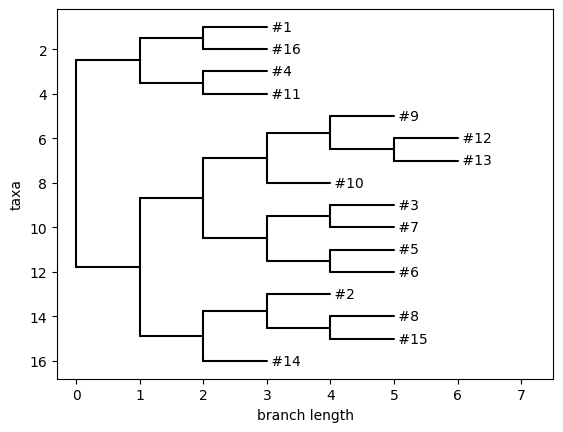

In [54]:
# Import packages
import numpy as np
import random as rand
import matplotlib.pyplot as plt

# Data point generation (JC69)
L = 100
N = 16
Bases = ['A', 'T', 'G', 'C']

sub_prob = 0.01

mut_seqs = []

for i in range(N):
    mut_seq = []
    for j in range(L):
        mut_seq.append(rand.choice(Bases))
    mut_seqs.append(mut_seq)

# Generate distance matrix
dist_matrix = np.zeros(shape = (N, N))
for i in range(N):
    for j in range(N):
        dist_matrix[i][j] = 0
        for k in range(L):
            if mut_seqs[i][k] != mut_seqs[j][k]: #(Hamming Distance)
                dist_matrix[i][j] += 1

lower_dist_matrix = []
for i in range(N):
    lower_dist_matrix.append(dist_matrix[i][:i+1])

lower_dist_matrix

lower = [list(map(float, row)) for row in lower_dist_matrix]

# Generate tree
from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor
from Bio import Phylo
from io import StringIO

labels = ['#' + str(i+1) for i in range(N)]

# Build tree from distance matrix
dm = DistanceMatrix(labels, lower)
constructor = DistanceTreeConstructor()
tree_nj = constructor.nj(dm)

# Unrooted to rooted
tree_nj.root_at_midpoint()


# Remove branch length & inner node name
for clade in tree_nj.find_clades():
    clade.branch_length = None
    if not clade.is_terminal():
        clade.name = None



# Visualize tree in image (with no name in inner branch)
Phylo.draw(tree_nj, label_func=lambda x: x.name)

# Visualize tree in ascii
# Phylo.draw_ascii(tree_nj)

# Change tree into newick format
# handle = StringIO()
# Phylo.write(tree_nj, handle, "newick")
# newick_str = handle.getvalue()

# Change newick distances to 1 decimal point 
# import re
# newick_str = re.sub(r"(\d+\.\d+)", lambda m: f"{float(m.group()):.1f}", newick_str)

# Print Newick 
# print(newick_str)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 7.7 MB/s  0:00:00m0:00:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ete3: filename=ete3-3.1.3-py3-none-any.whl size=2273900 sha256=a02cdcc8a74a66a0bb3857f66178bd2c9aa3b7ea56c506692dd648c63a851f17
  Stored in directory: /Users/yongjunchoi/Library/Caches/pip/wheels/88/cc/c1/0e0d50d8a29caccf5d482d883af1bc9d9af5b043ea108008c8
Successfully built ete3
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.
